In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
img=mpimg.imread("test.jpg")


In [2]:
mask_0=np.array([1,1,1,1,1,1,1,1,1]).reshape(3,3)
mask_0=mask_0/9

In [3]:
mask_1=np.random.randint(5,size=9).reshape(3,3)
mask_2=np.random.randint(5,size=9).reshape(3,3)
print(mask_1)
print("------")
print(mask_2)
print("------")
print(mask_1*mask_0)

[[4 0 2]
 [1 0 0]
 [1 4 3]]
------
[[3 0 2]
 [4 2 2]
 [3 4 4]]
------
[[0.44444444 0.         0.22222222]
 [0.11111111 0.         0.        ]
 [0.11111111 0.44444444 0.33333333]]


In [4]:
sum(sum(mask_1*mask_0))

1.6666666666666667

In [2]:
def get_default_mask_for_mean():
    return np.array([1,1,1,1,1,1,1,1,1]).reshape(3,3)/9

def apply_mask(part_of_image,mask=get_default_mask_for_mean()):

    return sum(sum(part_of_image*mask))

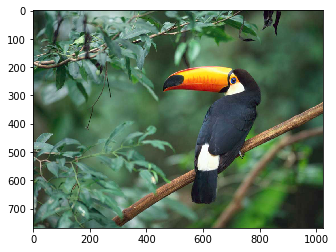

In [6]:
plt.imshow(img)
plt.show()

In [3]:
def get_distance(v,w=[1/3,1/3,1/3]):
    a,b,c=v[0],v[1],v[2]
    w1,w2,w3=w[0],w[1],w[2]
    d=((a**2)*w1+(b**2)*w2+(c**2)*w3)**.5
    return d

In [4]:
def convert_rgb_to_gray_level(im_1):
    m=im_1.shape[0]
    n=im_1.shape[1]
    im_2=np.zeros((m,n))
    for i in range(m):
        for j in range(n):
            im_2[i,j]=get_distance(im_1[i,j,:])
            
    return im_2

img_3=convert_rgb_to_gray_level(img)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f55e1005a20>,
 <matplotlib.image.AxesImage at 0x7f55e0f74668>)

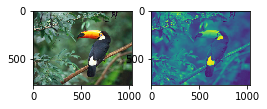

In [10]:
plt.subplot(1,3,1),plt.imshow(img)
plt.subplot(1,3,2),plt.imshow(img_3)

In [32]:
def get_mean_filter(img):
    
    m=img.shape[1]
    n=img.shape[1]
    img_2=np.zeros((m,n))

    for i in range(1,m-1):
        for j in range(1,n-1):
            poi=img[i-1:i+2,j-1:j+2]
            img_2[i,j]=apply_mask(poi)
    return img_2

In [31]:
get_mean_filter(img_3)

ValueError: operands could not be broadcast together with shapes (2,3) (3,3) 

In [30]:
mask_1=np.random.randint(20,size=9).reshape(3,3)
mask_1


array([[ 2, 13, 17],
       [ 7, 11, 15],
       [ 9,  3,  2]])

In [27]:
mask_1[:,0:1]

array([[ 5],
       [13],
       [15]])

In [5]:
def get_median(poi):
    s_1 = poi.reshape(1,9)
    s_1.sort()
    return s_1[0,4]

In [6]:
def get_median_filter(img):
    
    m=img.shape[1]
    n=img.shape[1]
    img_2=np.zeros((m,n))

    for i in range(1,m-1):
        for j in range(1,n-1):
            poi=img[i-1:i+2,j-1:j+2]
            # img_2[i,j]=apply_mask(poi)
            img_2[i,j]=get_median(poi)
    return img_2

In [7]:
get_median_filter(img_3)

ValueError: cannot reshape array of size 6 into shape (1,9)